In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import sys
sys.path.append('../src')

import itertools
import random
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
import util
from uscode import USCode
from citation_network import CitationNetwork
from cluster import Clustering

In [4]:
usc = USCode.from_json('../data/usc201909.json')
print(len(usc.titles()))

53


In [ ]:
# import networkx as nx

# class TitleCitationNetwork(nx.DiGraph):
#     def __init__(self, uscode):
#         super().__init__()

#         for sec in uscode.iter_sections():
#             title_id = util.extract_title_id(sec.id)
#             self.add_node(title_id)
#             for ref_id, ref_count in sec.refs.items():
#                 ref_title_id = util.extract_title_id(ref_id)
#                 self.update_edge(title_id, ref_title_id, weight=ref_count)

#     def sinks_from(self, node):
#         citations = nx.descendants(self, node)
#         return {c for c in citations if self.out_degree(c)}
    
#     def update_edge(self, src, dst, weight):
#         if self.has_edge(src, dst):
#             weight += self.edges[src, dst]['weight']
#         self.add_edge(src, dst, weight=weight)

In [5]:
cn = CitationNetwork(usc)
print(len(cn.nodes))

64175


In [7]:
title_sinks = {}

for i, sec_id in enumerate(cn.nodes):
    if i % 1000 == 0:
        print(i)
        
    title_id = util.extract_title_id(sec_id)
    node_sinks = cn.sinks_from(sec_id)
    title_sinks.setdefault(title_id, Counter()).update(node_sinks)
    
with open('../data/title_sinks_weighted.json', 'w') as f:
    json.dump(title_sinks, f)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000


In [24]:
with open('../data/title_sinks_weighted.json') as f:
    title_sinks = json.load(f)
    
for title in title_sinks:
    title_sinks[title] = Counter(title_sinks[title])

In [27]:
def distance(t1, t2):
    n_shared = len(title_sinks[t1.id].keys() & title_sinks[t2.id].keys())
    n_total = len(title_sinks[t1.id].keys() | title_sinks[t2.id].keys())
    return 1 - n_shared / max(1, n_total)

def weighted_distance(t1, t2):
    n_shared = sum((title_sinks[t1.id] & title_sinks[t2.id]).values())
    n_total = sum((title_sinks[t1.id] | title_sinks[t2.id]).values())
    return 1 - n_shared / max(1, n_total)

['t51', 't45', 't44', 't50', 't46', 't52', 't47', 't43', 't54', 't40', 't41', 't32', 't26', 't27', 't33', 't19', 't25', 't31', 't30', 't24', 't18', 't20', 't34', 't8', 't9', 't35', 't21', 't37', 't23', 't22', 't36', 't13', 't7', 't6', 't12', 't38', 't4', 't11', 't5', 't39', 't1', 't15', 't29', 't28', 't2', 't3', 't17', 't49', 't48']
['t42']
['t10']
['t14']
['t16']


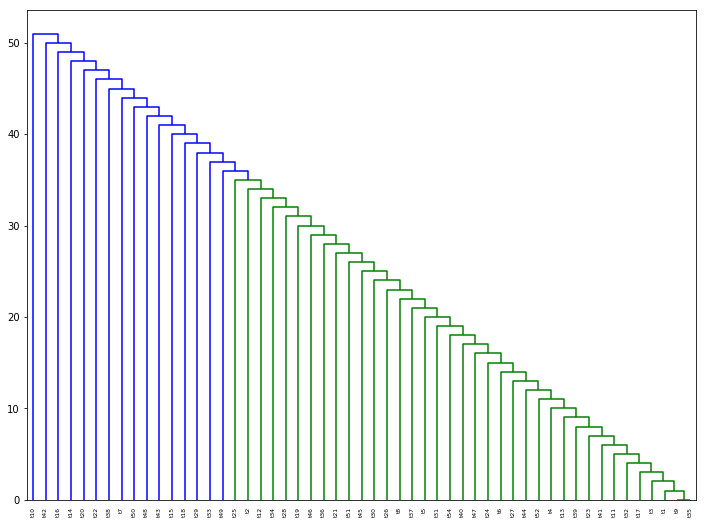

In [30]:
titles = list(usc.titles())

clustering = Clustering(titles, distance)
clusters = clustering.get_clusters(5)
for c in clusters:
    print(c)
    
plt.figure(figsize=(16, 12))
clustering.plot_dendrogram()

['t51', 't45', 't44', 't52', 't47', 't54', 't40', 't41', 't31', 't24', 't8', 't35', 't37', 't23', 't36', 't13', 't11', 't39', 't14', 't17', 't48']
['t50', 't46', 't43', 't26', 't33', 't19', 't25', 't30', 't18', 't20', 't34', 't21', 't22', 't7', 't6', 't12', 't38', 't10', 't5', 't15', 't29', 't28', 't16', 't2', 't49']
['t42']
['t32', 't27', 't4', 't3']
['t9', 't1']


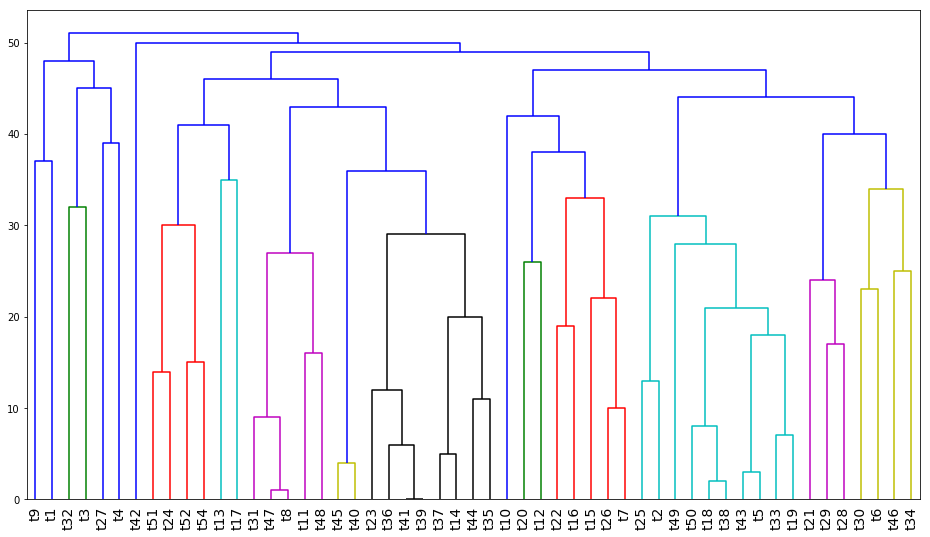

In [37]:
clustering = Clustering(titles, weighted_distance)
clusters = clustering.get_clusters(5)
for c in clusters:
    print(c)
    
plt.figure(figsize=(16, 9))
clustering.plot_dendrogram()
_ = plt.xticks(fontsize=14)